| **Name**         | Tufan Kundu               |
|------------------|---------------------------|
| **Reg No.**      | 24MDT0184                 |
| **Course Name**  | Financial Analytics Lab   |
| **Course Code**  | PMDS610P                  |
| **Assessment**   | Lab Digital Assessment 4  |


# Problem Statement
 You are given historical daily closing prices of the NIFTY 50 index from the National Stock Exchange of India (NSE). Your task is to analyze the volatility of stock prices using a Generalized Autoregressive Conditional Heteroskedasticity (GARCH) Model. Investigate the presence of heteroskedasticity and fit an appropriate GARCH model to capture volatility clustering.

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings 
warnings.filterwarnings('ignore')

In [10]:
# -----------------------------------------------
# 2.1 Data Preprocessing
# -----------------------------------------------
# Load NIFTY 50 data from Yahoo Finance (Jan 1, 2019 to Jan 1, 2024)
nifty = yf.download("^NSEI", start="2019-01-01", end="2024-01-01")

# Retain only the 'Close' column
nifty = nifty[['Close']]

# Convert index to datetime and set as index
nifty.index = pd.to_datetime(nifty.index)

# Compute log returns for volatility analysis
nifty['Log_Returns'] = np.log(nifty['Close'] / nifty['Close'].shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed

Log_Returns head: Date
2019-01-02         NaN
2019-01-03   -0.011205
2019-01-04    0.005150
2019-01-07    0.004135
2019-01-08    0.002814
Name: Log_Returns, dtype: float64
Log_Returns dtype: float64


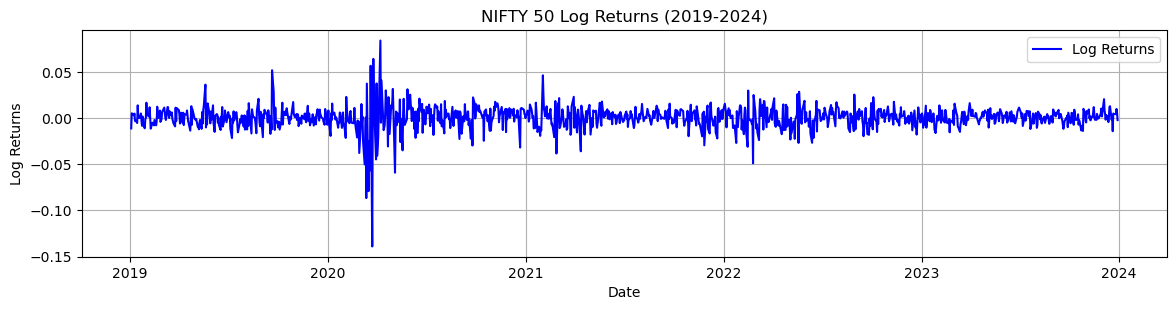

In [11]:
print("Log_Returns head:", nifty['Log_Returns'].head())
print("Log_Returns dtype:", nifty['Log_Returns'].dtype)

# Exploratory Data Analysis (EDA) for volatility clustering
plt.figure(figsize=(14, 10))

# Plot log returns
plt.subplot(3, 1, 1)
plt.plot(nifty['Log_Returns'], label='Log Returns', color='blue')
plt.title('NIFTY 50 Log Returns (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)


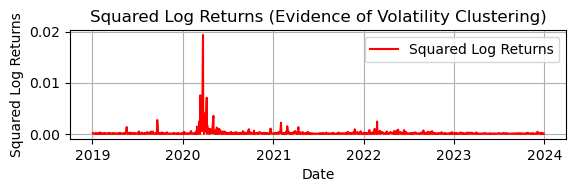

In [12]:
# Plotting squared log returns to detect volatility clustering
plt.subplot(3, 1, 2)
plt.plot(nifty['Log_Returns']**2, label='Squared Log Returns', color='red')
plt.title('Squared Log Returns (Evidence of Volatility Clustering)')
plt.xlabel('Date')
plt.ylabel('Squared Log Returns')
plt.legend()
plt.grid(True)


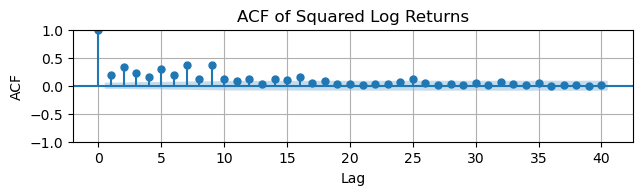


ADF Test on Log Returns:
ADF Statistic: -10.15861276967971
p-value: 7.612099455176255e-18


In [13]:
# ACF plot of squared returns to confirm volatility clustering
squared_returns = (nifty['Log_Returns'] ** 2).dropna()
plt.subplot(3, 1, 3)
plot_acf(squared_returns, lags=40, ax=plt.gca())
plt.title('ACF of Squared Log Returns')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)

plt.tight_layout()
plt.show()

# Checking stationarity of log returns
adf_result = adfuller(nifty['Log_Returns'].dropna())
print("\nADF Test on Log Returns:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")



In [14]:
# -----------------------------------------------
# 2.2 Modeling Volatility with GARCH
# -----------------------------------------------
# Fit GARCH(1,1) model using Maximum Likelihood Estimation (MLE)
garch_model = arch_model(nifty['Log_Returns'].dropna(), vol='Garch', p=1, q=1, dist='normal')
garch_results = garch_model.fit(update_freq=10, disp='off')

# Print GARCH model summary
print("\nGARCH(1,1) Model Summary:")
print(garch_results.summary())


GARCH(1,1) Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3986.62
Distribution:                  Normal   AIC:                          -7965.24
Method:            Maximum Likelihood   BIC:                          -7944.77
                                        No. Observations:                 1231
Date:                Sat, Apr 05 2025   Df Residuals:                     1230
Time:                        21:40:51   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.9060e-04  4.804e-0

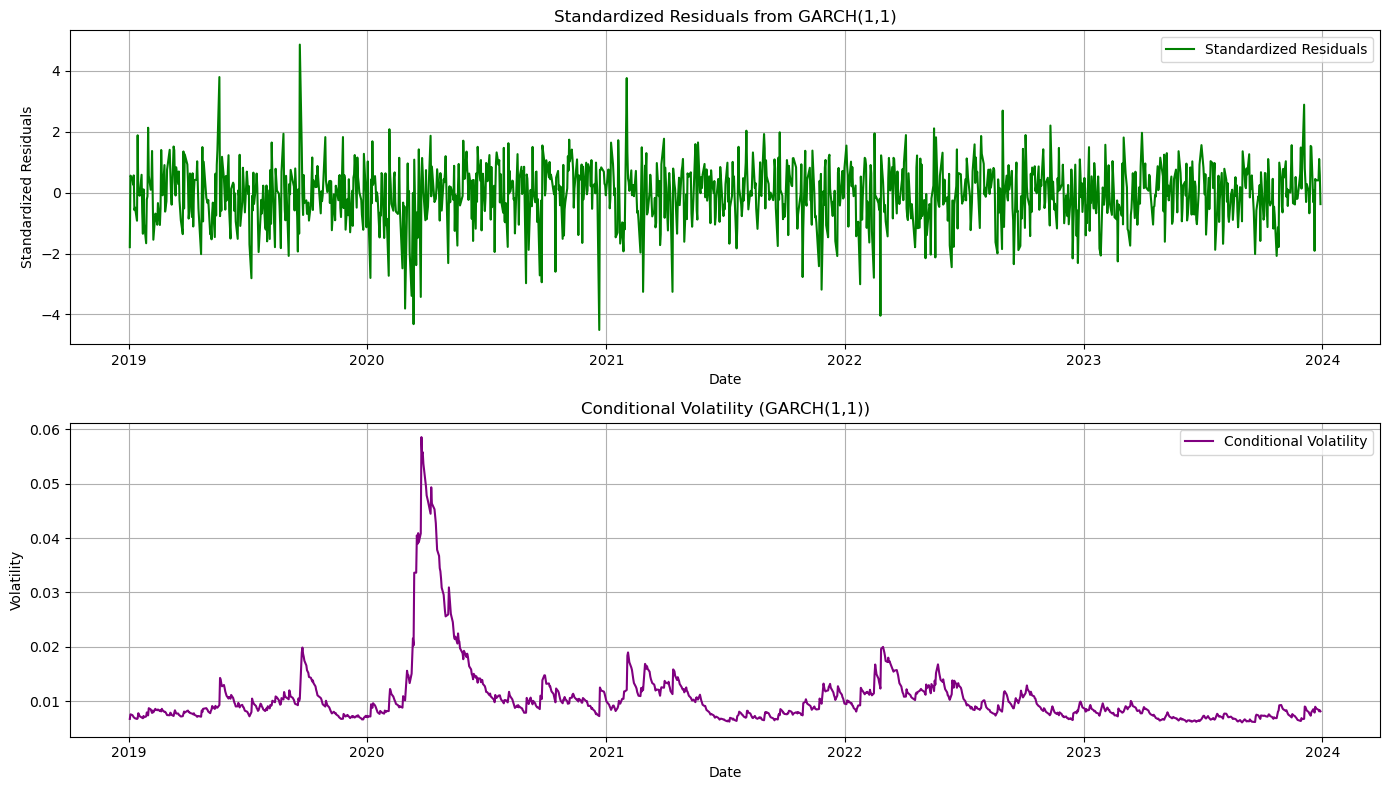

In [15]:
# -----------------------------------------------
# 2.3 Model Evaluation and Forecasting
# -----------------------------------------------
# Diagnostic plots
plt.figure(figsize=(14, 8))

# Plotting standardized residuals
plt.subplot(2, 1, 1)
std_residuals = garch_results.resid / garch_results.conditional_volatility
plt.plot(nifty.index[len(nifty) - len(std_residuals):], std_residuals, label='Standardized Residuals', color='green')
plt.title('Standardized Residuals from GARCH(1,1)')
plt.xlabel('Date')
plt.ylabel('Standardized Residuals')
plt.legend()
plt.grid(True)

# Plot conditional volatility
plt.subplot(2, 1, 2)
plt.plot(nifty.index[len(nifty) - len(garch_results.conditional_volatility):], 
         garch_results.conditional_volatility, label='Conditional Volatility', color='purple')
plt.title('Conditional Volatility (GARCH(1,1))')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Ljung-Box Test on Squared Standardized Residuals:
      lb_stat  lb_pvalue
10   8.371160   0.592632
20  22.291256   0.324918

30-Day Volatility Forecast (Annualized Standard Deviation):
Day 1: 0.1254
Day 2: 0.1271
Day 3: 0.1287
Day 4: 0.1303
Day 5: 0.1318
Day 6: 0.1333
Day 7: 0.1348
Day 8: 0.1362
Day 9: 0.1375
Day 10: 0.1388
Day 11: 0.1401
Day 12: 0.1414
Day 13: 0.1426
Day 14: 0.1437
Day 15: 0.1449
Day 16: 0.1460
Day 17: 0.1471
Day 18: 0.1481
Day 19: 0.1491
Day 20: 0.1501
Day 21: 0.1511
Day 22: 0.1520
Day 23: 0.1530
Day 24: 0.1538
Day 25: 0.1547
Day 26: 0.1556
Day 27: 0.1564
Day 28: 0.1572
Day 29: 0.1580
Day 30: 0.1588


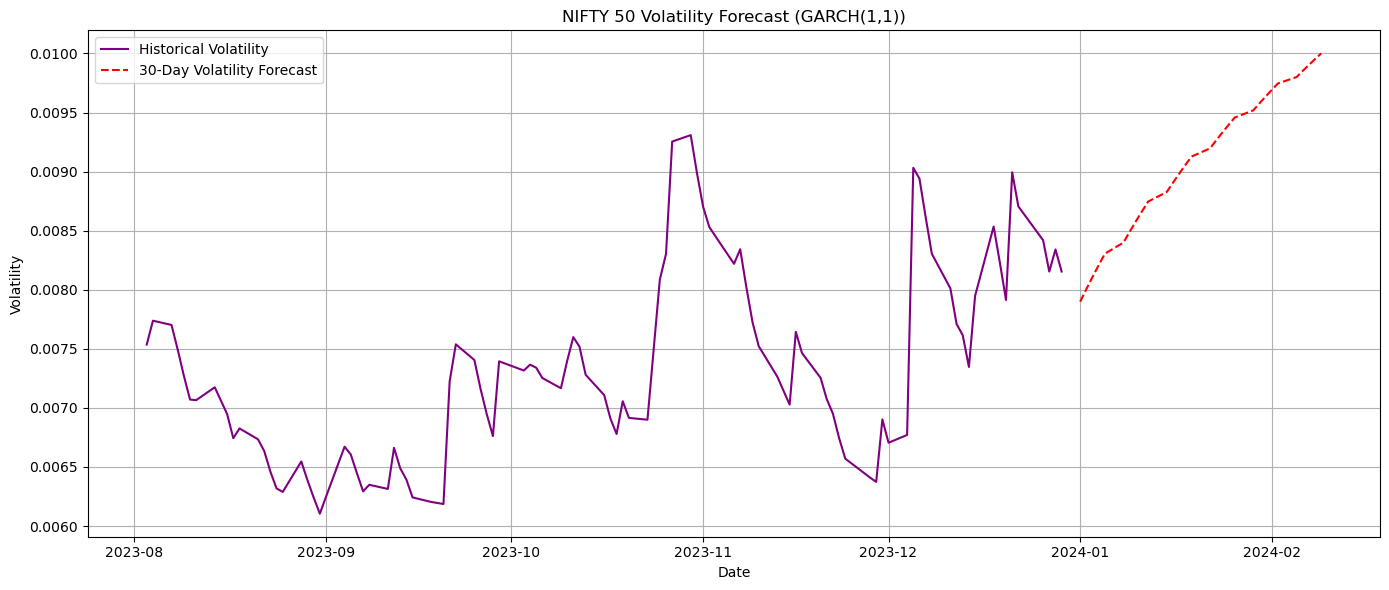

In [16]:
# Ljung-Box test on squared standardized residuals to evaluate model fit
lb_test = acorr_ljungbox(std_residuals**2, lags=[10, 20], return_df=True)
print("\nLjung-Box Test on Squared Standardized Residuals:")
print(lb_test)

# Forecast volatility for the next 30 days
forecast_horizon = 30
forecast = garch_results.forecast(horizon=forecast_horizon, start=None)
forecast_volatility = np.sqrt(forecast.variance.dropna().iloc[-1].values)


# Print annualized volatility forecast
print("\n30-Day Volatility Forecast (Annualized Standard Deviation):")
for i, vol in enumerate(forecast_volatility, 1):
    annualized_vol = vol * np.sqrt(252)  # Annualize by multiplying by sqrt(252)
    print(f"Day {i}: {annualized_vol:.4f}")
    
    
# Plot historical and forecasted volatility (last 100 days + 30-day forecast)
plt.figure(figsize=(14, 6))
plt.plot(nifty.index[-100:], garch_results.conditional_volatility[-100:], 
         label='Historical Volatility', color='purple')
future_dates = pd.date_range(start=nifty.index[-1] + pd.Timedelta(days=1), 
                            periods=forecast_horizon, freq='B')
plt.plot(future_dates, forecast_volatility, label='30-Day Volatility Forecast', 
         color='red', linestyle='--')
plt.title('NIFTY 50 Volatility Forecast (GARCH(1,1))')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

